# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

In [3]:
#Imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from random import sample, choice

In [4]:
DATA_DIR = './../data/'

cmpG = nx.DiGraph()
cmpG = nx.read_adjlist(f'{DATA_DIR}components.graph', create_using=nx.DiGraph)

absG = nx.Graph()
absG = nx.read_adjlist(f'{DATA_DIR}absorbing.graph', create_using=nx.DiGraph)

In [5]:
def draw_graph(G, title):
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.set_title(f'{title}')

    options = {
    'node_color': 'lightgreen',
    'node_size': 400,
    'width': 0.4,
    'arrowstyle': '->',
    'arrowsize': 20,
    }
    nx.draw_networkx(G, arrows=True, **options, pos=nx.spring_layout(G, k=0.8), ax=ax)

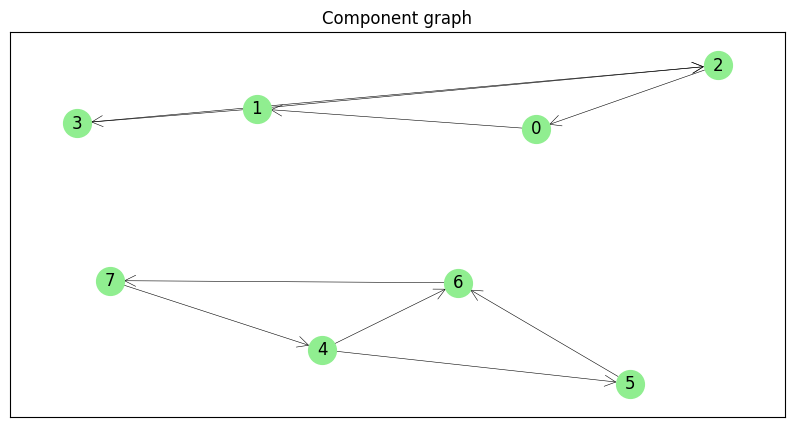

In [6]:
draw_graph(cmpG, 'Component graph')

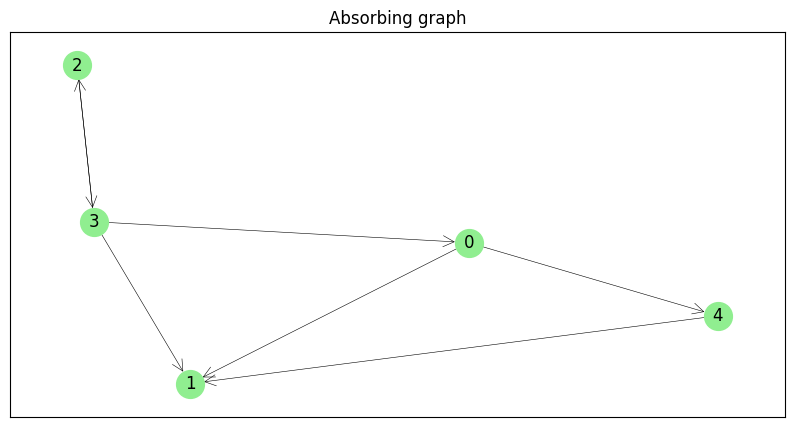

In [7]:
draw_graph(absG, 'Absorbing graph')

---

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [8]:
max_iter = 100

def normalize_dict(d):
    factor=1.0/sum(d.values())
    for k in d:
        d[k] = d[k]*factor
    return d

def random_surfer(G, max_iter):
    if not nx.is_directed(G):
        print('Graph converted to directed..')
        G = G.to_directed() 
    cnt_dict = {}
    node = random.choice(list(G.nodes))
    for i in range(max_iter):
        cnt_dict.setdefault(f'{node}', 0)
        cnt_dict[f'{node}'] += 1
        try:
            node = random.choice(list(G.successors(f'{node}')))
        except IndexError:
            print(f"Node {node} is a dangling node!")
            break
    return normalize_dict(cnt_dict)

In [9]:
print("Component graph info: ")
random_surfer(cmpG, max_iter)

Component graph info: 


{'2': 0.28, '0': 0.28, '1': 0.28, '3': 0.16}

In [10]:
print("Absorbing graph info: ")
random_surfer(absG, max_iter)

Absorbing graph info: 
Node 1 is a dangling node!


{'0': 0.5, '1': 0.5}

### Component Graph:
The graph is split into two parts, so we are unable to get from any node to the rest of the graph.
### Absorbing Graph:
The graph has one absorbing node, which is the node 1. If our algorithm ended up in this node, we are unable to run the algorithm further.

---

### 2.4.1 Random Surfer Model

#### Exercise 2.13

In [11]:
max_iter = 100
damping_factor = 0.15

def pageRank(G, max_iter, damping_factor):
    if not nx.is_directed(G):
        print('Graph converted to directed..')
        G = G.to_directed() 
    cnt_dict = {}
    
    node = random.choice(list(G.nodes))
    for i in range(max_iter): 
        if random.uniform(0,1) < damping_factor:
            node = random.choice(list(G.nodes))
            print(f'Randomly Restarting the surfer from node {node}')
        else:
            cnt_dict.setdefault(f'{node}', 0)
            cnt_dict[f'{node}'] += 1
            try:
                node = random.choice(list(G.successors(f'{node}')))
            except IndexError:
                print(f"node = random.choice(list(G.nodes))Node {node} is a dangling node!")
                node = random.choice(list(G.nodes))
                print(f'Restarting the surfer from node {node}')
    return normalize_dict(cnt_dict)


In [12]:
print("Component graph info: ")
pageRank(cmpG, max_iter, damping_factor)

Component graph info: 
Randomly Restarting the surfer from node 1
Randomly Restarting the surfer from node 1
Randomly Restarting the surfer from node 5
Randomly Restarting the surfer from node 0
Randomly Restarting the surfer from node 0
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 3
Randomly Restarting the surfer from node 2
Randomly Restarting the surfer from node 2
Randomly Restarting the surfer from node 6
Randomly Restarting the surfer from node 4
Randomly Restarting the surfer from node 1
Randomly Restarting the surfer from node 7
Randomly Restarting the surfer from node 2


{'5': 0.06976744186046512,
 '6': 0.10465116279069767,
 '7': 0.08139534883720931,
 '4': 0.08139534883720931,
 '1': 0.19767441860465115,
 '3': 0.10465116279069767,
 '2': 0.18604651162790697,
 '0': 0.1744186046511628}

In [13]:
print("Absorbing graph info: ")
pageRank(absG, max_iter = 100, damping_factor = 0.15)

Absorbing graph info: 
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 2
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 0
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 1
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 4
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the surfer from node 2
Randomly Restarting the surfer from node 4
Randomly Restarting the surfer from node 1
Randomly Restarting the surfer from node 4
node = random.choice(list(G.nodes))Node 1 is a dangling node!
Restarting the sur

{'0': 0.1954022988505747,
 '1': 0.3793103448275862,
 '4': 0.1954022988505747,
 '2': 0.10344827586206896,
 '3': 0.12643678160919541}

### Component Graph:
Yes, and all the graph nodes have chance to be choosen.
### Absorbing Graph:
Yes, the node with the biggest indegree is node 1, and it has the largest probability - score.

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [14]:
#function that shows how the algorithm converages
def convergence_speed(num_iter, NORM):
    plt.figure(figsize=(5,4))
    plt.plot(range(num_iter+1), NORM)
    plt.xlabel('iterations')
    plt.ylabel('Euclidean Norm')
    plt.title('Convergence plot')
    return plt.show()

In [15]:
#pageRank with power iteration method
def get_google_matrix(G, d=0.15):
    n = G.number_of_nodes()
    A = nx.to_numpy_array(G).T
    #print(A)

    # for sink nodes
    is_sink = np.sum(A, axis=0)==0
    #print( A[:, is_sink])
    B = (np.ones_like(A) - np.identity(n)) / (n-1)
    #print(B)
    A[:, is_sink] += B[:, is_sink]
    #print(A)
    D_inv = np.diag(1/np.sum(A, axis=0))
    #print(D_inv)
    M = np.dot(A, D_inv) 
    #print(M)
    
    # for disconnected components
    M = (1-d)*M + d*np.ones((n,n))/n
    return M

In [16]:
get_google_matrix(absG)

array([[0.03      , 0.2425    , 0.03      , 0.03      , 0.31333333],
       [0.455     , 0.03      , 0.88      , 0.03      , 0.31333333],
       [0.455     , 0.2425    , 0.03      , 0.03      , 0.03      ],
       [0.03      , 0.2425    , 0.03      , 0.03      , 0.31333333],
       [0.03      , 0.2425    , 0.03      , 0.88      , 0.03      ]])

In [17]:
def pagerank_power(G, d=0.15, max_iter=100, eps=1e-7, display_convergence_speed=False):
    M = get_google_matrix(G, d=d)
    n = G.number_of_nodes()
    V = np.ones(n)/n

    NORM = []
    for _ in range(max_iter):
        V_last = V
        V = np.dot(M, V)
        L2 = np.linalg.norm(V-V_last)
        NORM.append(L2)
        if L2 < eps:
            print(f'Converged at {_+1} iterations..')
            break
    if display_convergence_speed:
        convergence_speed(_, NORM)
    return V

In [18]:
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

Converged at 22 iterations..


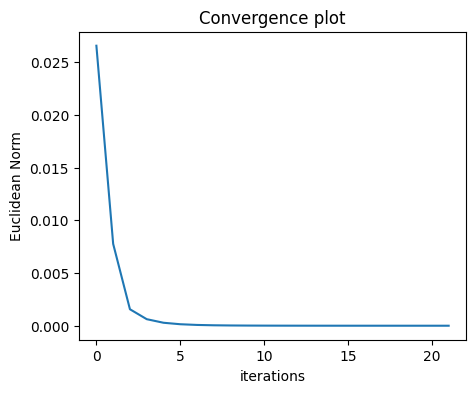

array([3.21039590e-04, 1.71007069e-04, 1.61661462e-04, ...,
       2.71154396e-05, 2.71154396e-05, 2.71154396e-05])

In [19]:
pagerank_power(wikiG, display_convergence_speed=True)

KeyboardInterrupt: 

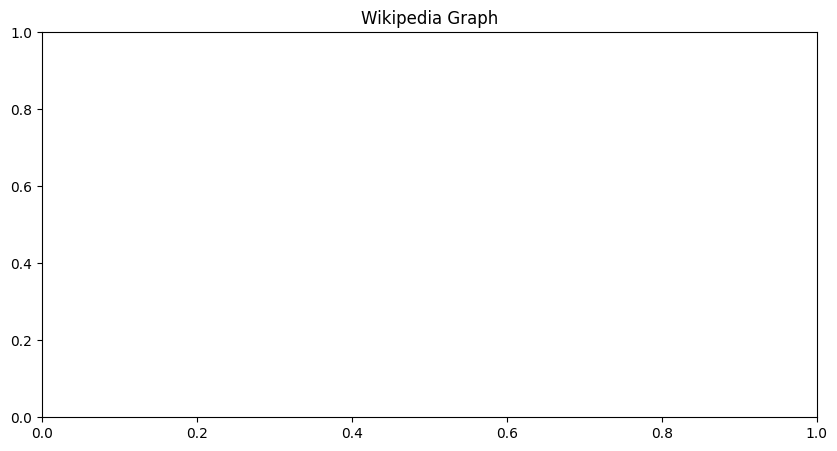

In [20]:
draw_graph(wikiG, 'Wikipedia Graph')

In [21]:
def graph_to_dataframe(G):
    return pd.read_csv(f'{DATA_DIR}wikipedia_titles.tsv', sep='\t', index_col=0)

def get_highest_scores_pages(G, how_many):
    arr = pagerank_power(G)
    return arr.argsort()[-how_many:][::-1]

def get_webpage_names(G, how_many):
    ind = get_highest_scores_pages(G, how_many)

    wiki_pd = graph_to_dataframe(G)
    return wiki_pd.iloc[list(ind)]

In [22]:
get_webpage_names(wikiG, 10)

Converged at 22 iterations..


,page_title
#page_id,
548,Anna Laetitia Barbauld
64,1801
128,1868
173,1911
129,1869
72,1809
1446,Crimean War
192,1929
36,1774


---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*

In [23]:
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

In [26]:
# 1. original pageRank:
seed = 257

def get_score(G, page_name):
    wiki_pd = graph_to_dataframe(G)
    print(wiki_pd)
    id = wiki_pd.loc[wiki_pd['page_title'] == page_name].index
    #print(id)
    #print(pagerank_power(G))
    return id, pagerank_power(G)[id]
    #return pagerank_power(G)

id, score1 = get_score(wikiG, 'History of mathematics')
print(id[0])
print(score1)
#print(nx.pagerank(wikiG)['2463'])

#absG = nx.Graph()
#absG = nx.read_adjlist(f'{DATA_DIR}absorbing.graph', create_using=nx.DiGraph)

#score = get_score(absG, '2')
#score[3]
#pagerank_power(absG)

                  page_title
#page_id                    
0                 0 (number)
1          10 Downing Street
2               10th century
3               11th century
4                 1 (number)
...                      ...
5535                 Zionism
5536      Zion National Park
5537               Zirconium
5538               Zoroaster
5539                    Zulu

[5540 rows x 1 columns]
Converged at 22 iterations..
2463
[0.00012509]


In [25]:
# 2. add 300 edges randomly
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)
#print(len(wikiG.nodes()))
#print(wikiG.edges())

def add_random_edges(G, to_node, edges_budget):
    random_nodes = random.sample(G.nodes(), edges_budget)
    print(random_nodes)
    print(to_node)
    new_edges = [(i, to_node) for i in random_nodes]
    G.add_edges_from(new_edges)

print(len(wikiG.edges()))
add_random_edges(wikiG, str(id[0]), 300)
print(len(wikiG.edges()))

#for edge in wikiG.edges():
#    if edge[1] == '2463':
#        print(edge)

id, score2 = get_score(wikiG, 'History of mathematics')

print(id[0])
print(score2)
#score2 = nx.pagerank(wikiG)['2463']
#print(nx.pagerank(wikiG)['2463'])

print(score1[0] < score2[0])
nx.write_adjlist(wikiG, "test.adjlist")
#absG = nx.Graph()
#absG = nx.read_adjlist(f'{DATA_DIR}absorbing.graph', create_using=nx.DiGraph)

#add_random_edges(absG, '2', 5)
#score = get_score(absG, '2')
#score[3]

197056
['3123', '394', '928', '1382', '3477', '1088', '816', '5497', '372', '2164', '2629', '3111', '4441', '1525', '1663', '945', '4291', '3208', '5450', '5281', '1365', '5492', '1498', '3061', '177', '1298', '5385', '905', '3170', '658', '295', '2187', '521', '4072', '4553', '3745', '490', '4029', '2345', '3495', '1391', '1058', '4953', '1375', '2774', '1638', '2400', '2923', '4849', '5051', '3968', '2366', '2428', '1008', '175', '1460', '5509', '4372', '1119', '2053', '5145', '3620', '2707', '3817', '3959', '2855', '1665', '1729', '222', '2520', '382', '1857', '3325', '2485', '3438', '4630', '1265', '779', '2513', '1820', '4670', '1408', '1109', '2863', '4633', '5506', '1295', '72', '4615', '3402', '5283', '4631', '879', '1247', '5455', '3973', '4201', '4173', '4828', '203', '1407', '1881', '296', '3372', '4996', '169', '3753', '5451', '4217', '2229', '5431', '3540', '3095', '2121', '923', '49', '2093', '4287', '51', '2646', '2526', '764', '5363', '4203', '5502', '2305', '4111', '61

C:\Users\ewa.miazga\AppData\Local\Temp\ipykernel_25424\2869520358.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(G.nodes(), edges_budget)


Converged at 22 iterations..
[3.39656692e-04 1.75280440e-04 1.62479390e-04 ... 2.71154154e-05
 2.71154154e-05 2.71154154e-05]
Converged at 22 iterations..
2463
[0.00012509]
0.0014538677214578958
False


In [ ]:
# add edges between highest scored pages and our page
wikiG = nx.Graph()
wikiG = nx.read_adjlist(f'{DATA_DIR}wikipedia.graph', create_using=nx.DiGraph)

def add_edges(G, to_node, edges_budget):
    ind = get_highest_scores_pages(G, edges_budget)
    new_edges = [(str(i), to_node) for i in ind]
    G.add_edges_from(new_edges)

print(len(wikiG.edges()))
add_edges(wikiG, str(id[0]), 300)
print(len(wikiG.edges()))

id, score3 = get_score(wikiG, 'History of mathematics')
print(id[0])
print(score3)
print(nx.pagerank(wikiG)['2463'])

score3 = nx.pagerank(wikiG)['2463']
print(score1 < score3)
print(score2 < score3)

#absG = nx.Graph()
#absG = nx.read_adjlist(f'{DATA_DIR}absorbing.graph', create_using=nx.DiGraph)

#add_edges(absG, '2', 5)
#score = get_score(absG, '2')
#score[3]

197056
Converged at 22 iterations..
197356
Int64Index([2463], dtype='int64', name='#page_id')
Converged at 23 iterations..
[3.34376736e-04 1.74194459e-04 1.61580029e-04 ... 2.71154255e-05
 2.71154255e-05 2.71154255e-05]
Converged at 23 iterations..
2463
[0.00012514]
0.0012323769527029602
[ True]
False
